<a href="https://colab.research.google.com/github/gnatnib/machine_learning_practicum/blob/main/Pertemuan02/03_K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**I. Melakukan Clustering dengan Sample Dataset**

# **1. Import Dataset**

In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [6]:
#import dataset
df = pd.read_csv('/content/sample_data/xclara.csv')
print(df.shape)
(3000,2)
print(df.head(20))

(3000, 2)
           V1         V2
0    2.072345  -3.241693
1   17.936710  15.784810
2    1.083576   7.319176
3   11.120670  14.406780
4   23.711550   2.557729
5   24.169930  32.024780
6   21.665780   4.892855
7    4.693684  12.342170
8   19.211910  -1.121366
9    4.230391  -4.441536
10   9.127130  23.605720
11   0.407503  15.297050
12   7.314846   3.309312
13  -3.438403 -12.025270
14  17.639350  -3.212345
15   4.415292  22.815550
16  11.941220   8.122487
17   0.725853   1.806819
18   8.185273  28.132600
19  -5.773587   1.024800


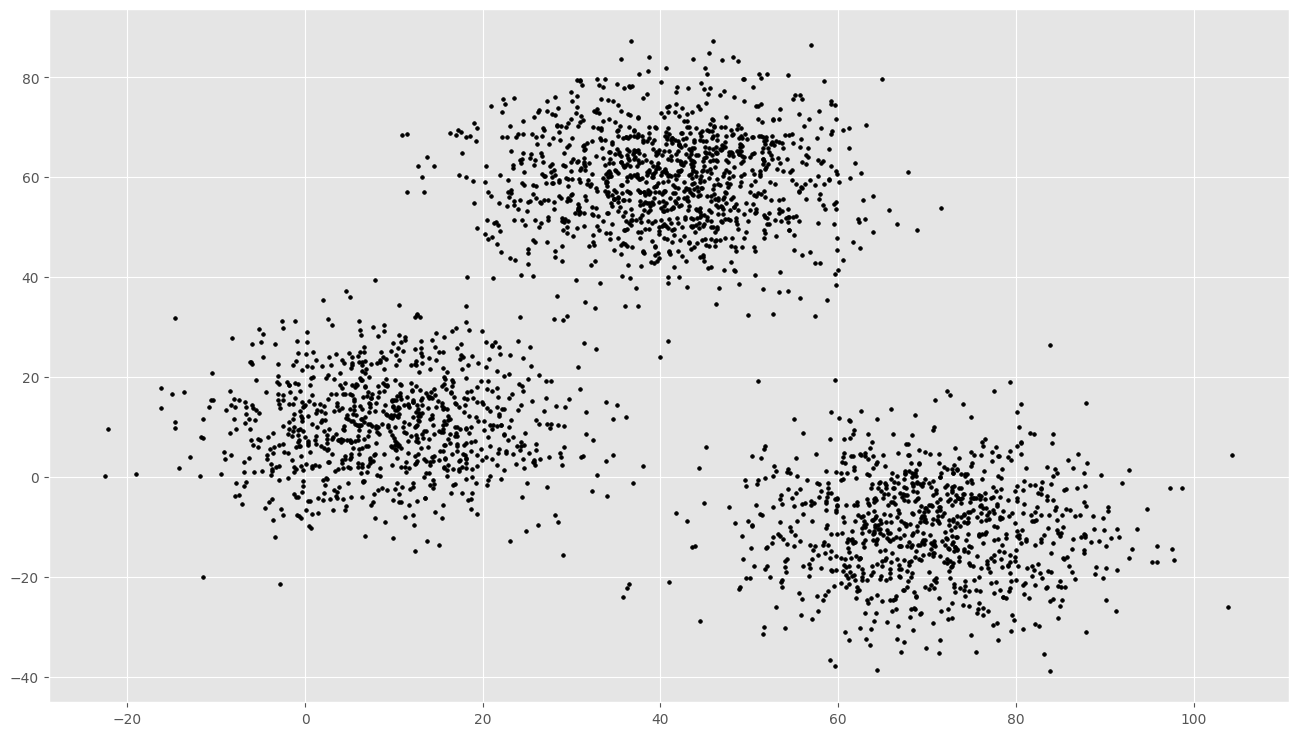

In [8]:
from re import X
#plot dataset
f1 = df['V1'].values
f2 = df['V2'].values
X = np.array(list(zip(f1,f2)))
plt.scatter(f1, f2, c='black', s=7)

# **2. Melakukan Clustering**


In [9]:
# Clustering
from sklearn.cluster import KMeans

# Menentukan jumlah cluster

kmeans = KMeans(n_clusters=3)
# Fitting input data
kmeans = kmeans.fit(X)

# Mendapatkan cluster labels
labels = kmeans.predict(X)

# Mendapatkan nilai centroid
C = kmeans.cluster_centers_

# Mencetak nilai centroid
print(C)

[[  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]]


# **3. Plot Hasil Clustering**

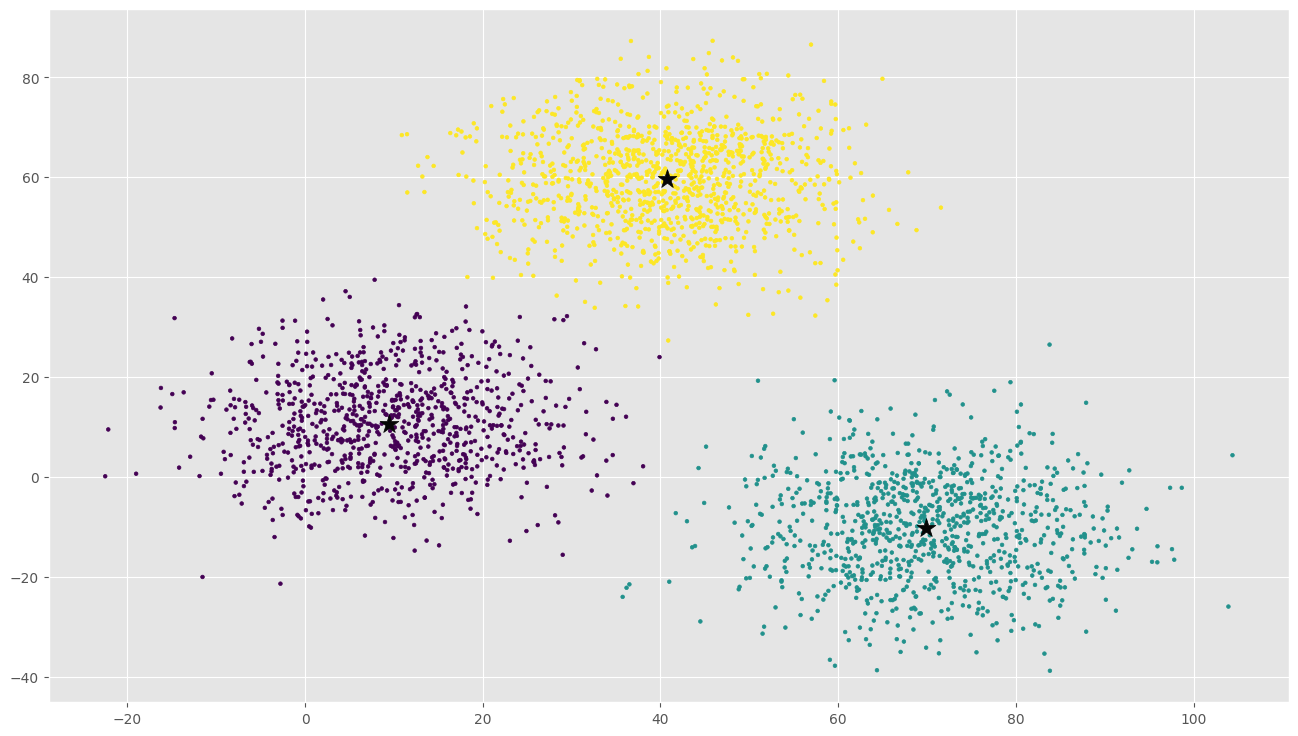

In [10]:
plt.scatter(X[:, 0], X[:, 1], s=7, c=labels)
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

# **II. Melakukan Clustering Menggunakan Generate Dataset**

**1. Generate Dataset**

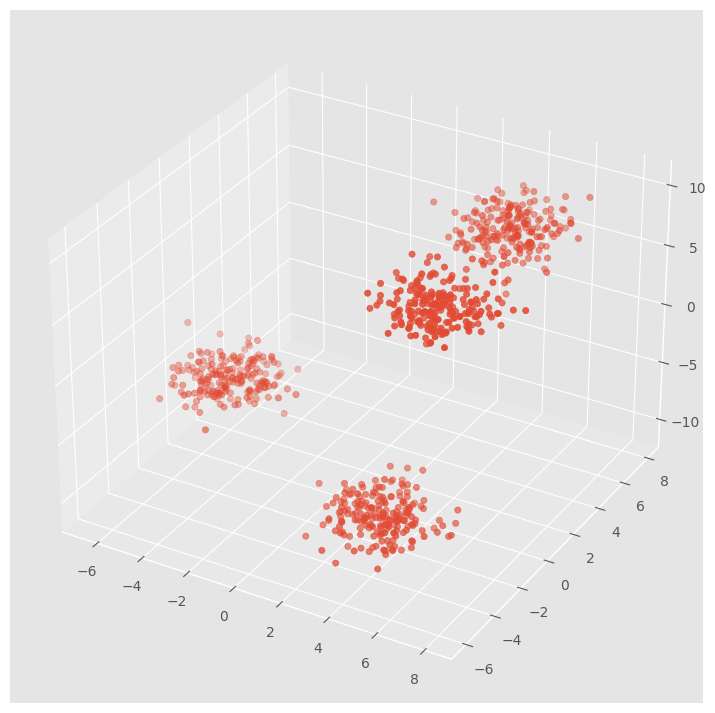

In [23]:
from mpl_toolkits.mplot3d import Axes3D
# from skelarn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16,9)

# Generate dataset yang terkelompok dalam 4 cluster
X, y = make_blobs(n_samples = 800, n_features=3, centers = 4)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

**2. Melakukan Clustering**

In [24]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)

# Fitting with inputs
kmeans = kmeans.fit(X)

# Predicting the clusters
labels = kmeans.predict(X)

# Getting the cluster centers
C = kmeans.cluster_centers_

**3. Plot hasil clustering**

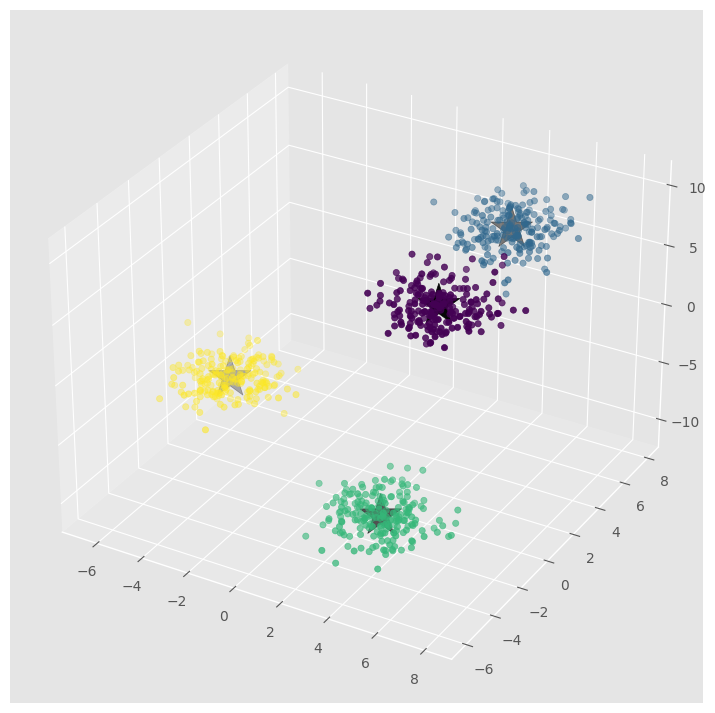

In [28]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
plt.show()

#**III. Melakukan Evaluasi Hasil Clustering**

In [41]:
for k in range (1,10):
  #Menentukan jumlah cluster
  kmeans = KMeans (n_clusters=k, random_state=1)

  #Fitting input data
  kmeans = kmeans.fit(X)

  #Mendapatkan cluster labels
  labels = kmeans.predict(X)

  #Menghitung jumlahan jarak antara setiap sample centroid-nya (SSE)
  inertia = kmeans.inertia_
  print("k:", k)
  print(f"Inertia Cost: {inertia:.3f}\n")

k: 1
Inertia Cost: 60441.980

k: 2
Inertia Cost: 14993.210

k: 3
Inertia Cost: 6100.497

k: 4
Inertia Cost: 2500.287

k: 5
Inertia Cost: 2333.908

k: 6
Inertia Cost: 2195.929

k: 7
Inertia Cost: 2022.354

k: 8
Inertia Cost: 1925.312

k: 9
Inertia Cost: 1861.263



In [37]:
from sklearn.metrics.cluster import silhouette_score
for k in range(2, 10):  # Note: silhouette score needs at least 2 clusters
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)

    # Get labels and calculate scores
    labels = kmeans.predict(X)
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X, labels)

    print(f"k: {k}")
    print(f"Silhouette Score: {silhouette:.3f}\n")

k: 2
Silhouette Score: 0.678

k: 3
Silhouette Score: 0.734

k: 4
Silhouette Score: 0.691

k: 5
Silhouette Score: 0.561

k: 6
Silhouette Score: 0.454

k: 7
Silhouette Score: 0.366

k: 8
Silhouette Score: 0.322

k: 9
Silhouette Score: 0.312



**Tugas!**


1.   Lakukan clustering menggunakan dataset iris!
2.   Lakukan evaluasi hassil clustering menggunakan inertia cost dan silhouette coefficient!

